# Building ANN model using sklearn MLP classifier

In [1]:
import pandas as pd

In [7]:
# Extracting the file data
df = pd.read_csv(r"C:\Users\tania\Desktop\winetype.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red


In [13]:
# Assign data from first 10 columns to X variable
X = df.iloc[:, 0:11]

# Assign data from type column to y variable
y = df.select_dtypes(include=[object])

In [14]:
y.head()

,type
0,red
1,red
2,red
3,red
4,red


In [15]:
y.type.unique()

array(['red', 'white'], dtype=object)

In [16]:
from sklearn import preprocessing

In [17]:
le = preprocessing.LabelEncoder()

y = y.apply(le.fit_transform)

Train and Test 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Using Sklearn multilayer perceptron classifier

In [20]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [21]:
predictions = mlp.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[315   4]
 [  2 979]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       319
           1       1.00      1.00      1.00       981

    accuracy                           1.00      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



In [43]:
from sklearn.metrics import confusion_matrix 

In [40]:
cm = confusion_matrix(y_test, predictions)

In [41]:
cm

array([[315,   4],
       [  2, 979]], dtype=int64)

Text(42.0, 0.5, 'Truth')

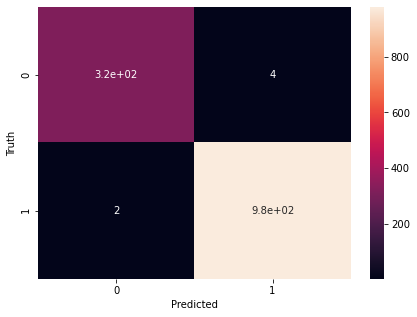

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')